In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

In [ ]:
#Generating some sample data
np.random.seed(0)
dates =pd.date_range(start='2024-01-01', end ='2024-12-31')
data =np.random.randn(len(dates))
data=np.cumsum(data) # Cumulative sum of data
df=pd.DataFrame(data, index=dates,columns=['Value'])

In [ ]:
#Split data into train and test sets
train_size=int(len(df) *0.8)
train,test=df[:train_size],df[train_size:]
#check stationarity
def check_stationarity(timeseries):
  result=adfuller(timeseries)
  print('ADF Statistics:',result[0])
  print('P-Value:', result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print('\t%s: %.3f' % (key,value))

In [ ]:
check_stationarity(train['Value'])
#if data is not stationary, take first difference
train_diff=train.diff().dropna()
check_stationarity (train_diff['Value'])
#fit a linear regression model
X_train=np.arange(len(train)).reshape(-1,1)
y_train=train['Value']
regressor=LinearRegression()
regressor.fit(X_train, y_train)
trend=regressor.predict(X_train)
#Fit the ARIMA model on residuals
model=ARIMA(train_diff, order=(5,1,0)) #p=5, d=1, Q=0
fitted_model=model.fit()

In [ ]:
#Predict using the fitted ARIMA model
predictions_diff=fitted_model.forecast(steps=len(test))[0]
predictions_diff=pd.Series(predictions_diff, index=test.index)
#ADD Trends back to get the final PREDICTIONS
predictions=predictions_diff + trend[-1]

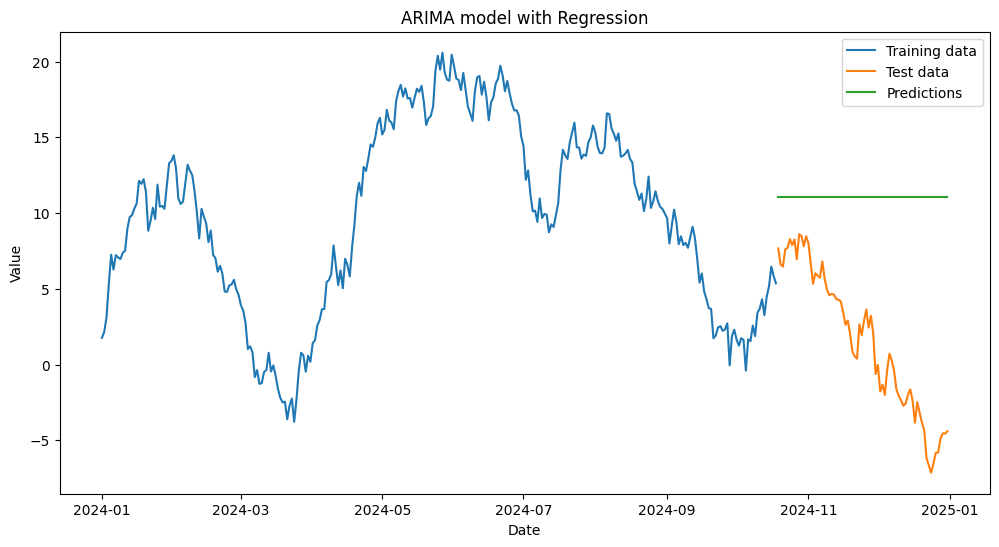

In [ ]:
#Plotting the future trends based on historical data
plt.figure(figsize=(12,6))
plt.plot(train.index, train['Value'],label ='Training data')
plt.plot(test.index, test['Value'],label ='Test data')
plt.plot(predictions.index,predictions, label='Predictions')
plt.title('ARIMA model with Regression')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()